In [140]:
import numpy
import math
from matplotlib import pyplot
# display figures in the Notebook
%matplotlib inline

## Lesson 2 Notes

In this lesson, I learn to build a solution of potential flow by adding a source and sink - and, this time, a uniform free stream. This takes advantage of superposition, the loveliest of properties of linear potential flow (governed by Laplace's equation: $\nabla^2 \phi =0$).

Like in lesson 1, we create a grid of points where we'll calculate the velocity. Later, we can figure out how to automate this process, but for now we copy and paste the grid code for lesson 1 (no use putting in unneccessary effort, amirite ladies?).

In [141]:
n = 200
xa, xz = -4.0, 4.0
ya, yz = -2.0, 2.0
x = numpy.linspace(xa,xz,n)
y = numpy.linspace(ya,yz,n)

X,Y = numpy.meshgrid(x,y)
numpy.shape(X)

(200, 200)

## Source in a uniform flow

Last lesson we looked at velocity fields of source, sink, and source-sink. Now we'll start by superimposing a source on a uniform flow and seeing what happpens. 

The streamlines of a freestream with speed $U_\infty$ and angle of attack $\alpha$ are given by: 

$$\psi_\text{freestream}\left(x,y\right) = U_\infty \left(y\cos\alpha - x\sin\alpha\right)$$

This equation does make sense. Streamlines are parallel, straight lines that make an angle $\alpha$ with the $x$-axis. If the flow is completely horizontal, then $sin\alpha$ is 0 and $cos\alpha$ is 1, simplifying the above equation to $\psi$ = $U_\infty$ $y$. If you integrate this, you get that $u$ = $U_\infty$ and $v$ = 0, a horizontal flow.

The code below will fill the arrays containing the $u$-velocity, the $v$-velocity, and the stream function of a uniform, *horizontal* flow ($U_\infty$,$\alpha=0$) on every point of the grid created above. Note the use of `ones()` and `zeros()`.

In [142]:
u_inf = 1.0     # freestream speed

# freestream velocity field
u_fs = u_inf * numpy.ones((n,n), dtype=float)
v_fs = u_inf * numpy.ones((n,n), dtype=float)

# stream-function
psi_fs = u_inf * Y

 From our previous *AeroPython* notebook, the stream function of a source flow located at $\left(x_\text{source},y_\text{source}\right)$ is:

$$\psi_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

and the velocity components are:

$$u_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

$$v_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

We're gonna make a function called `getvel()` that will compute the velocity components $\left(u,v\right)$ on a mesh `(X,Y)` given the `strength` of the singularity and its location `(xs,ys)`. We define functions with the `def` command, followed by the function name and any parameters inside parens. The lines ends with a colon. 

In [143]:
def getvel(strength,xs,ys,X,Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Paremeters 
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the s/s.
    ys: float
        y-coordinate of the s/s.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
        
    Returns
    -------
    u: 2D numpy array of floats
        x-component of the vel vector field.
    v: 2D numpy array of floats
        y-component of the vel vector field.
    """
    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

Any message after a function definition between `"""Triple quotes"""` is a docstring and is there as a kind of documentation to help the user learn the function. It is displayed by calling help() as below.

In [144]:
help(getvel)

Help on function getvel in module __main__:

getvel(strength, xs, ys, X, Y)
    Returns the velocity field generated by a source/sink.
    
    Paremeters 
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the s/s.
    ys: float
        y-coordinate of the s/s.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
        
    Returns
    -------
    u: 2D numpy array of floats
        x-component of the vel vector field.
    v: 2D numpy array of floats
        y-component of the vel vector field.



We'll now create another function to calculate the stream-function of the singularity (source or sink) on the mesh grid. We'll call this function `getstreamfunc()`.

In [145]:
def getstreamfunc(strength,xs,ys,X,Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

Cool as hell, now let's use them.

In [146]:
strength_source = 5.0
x_source, y_source = 0,0
x_source2, y_source2 = 2,0

u_source, v_source = getvel(strength_source,x_source,y_source,X,Y)
# u_source2, v_source2 = getvel(strength_source,x_source2,y_source2,X,Y)
psi_source = getstreamfunc(strength_source,x_source,y_source,X,Y)
# psi_source2 = getstreamfunc(strength_source,x_source2,y_source2,X,Y)

strength_sink = -5.0     
x_sink, y_sink = 1,1
x_sink2, y_sink2 = 1,-1 

u_sink, v_sink = getvel(strength_sink, x_sink, y_sink, X, Y)
psi_sink = getstreamfunc(strength_sink, x_sink, y_sink, X, Y)
# u_sink2, v_sink2 = getvel(strength_sink, x_sink2, y_sink2, X, Y)
# psi_sink2 = getstreamfunc(strength_sink, x_sink2, y_sink2, X, Y)

Let's again use our superposition powers. The streamlines of the combination of a freestream and a source flow are:

$$\psi = \psi_{freestream}+\psi_{source} = U_\infty y + \frac{\sigma}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

And since differentiation is linear, the velocity field induced by the new flow pattern is simply the sum of the freestream velocity field and the source velocity field:

$$u = u_\text{freestream} + u_\text{source}$$
$$v = v_\text{freestream} + v_\text{source}$$

The stagnation points in the flow are points where the velocity is zero (stagnant fluid, get it?). To find their location, we solve the following equations:

$$u = 0 , \quad v = 0$$

which leads to:

$$x_\text{stagnation} = x_\text{source} - \frac{\sigma}{2\pi U_\infty}$$

$$y_\text{stagnation} = y_\text{source}$$

The streamline containing the stagnation point is called the *dividing streamline*. It seperates the fluid coming from the freestream and the fluid radiating from the source flow. On the streamline plot, we'll add a red curve to show the dividing streamline, and we'll use the [`contour()`](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) function for that. 

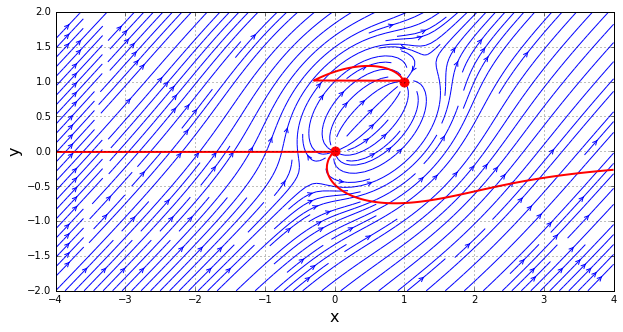

In [147]:
# superposition of the source on the freestream
u = u_fs + u_source + u_sink
v = v_fs + v_source + v_sink
psi = psi_fs + psi_source + psi_sink 

# plot that mfing streamline 
size = 10
pyplot.figure(figsize=(size,(yz-ya)/(xz-xa)*size))
pyplot.grid(True)
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(xa, xz)
pyplot.ylim(ya, yz)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter([x_source,x_sink],[y_source,y_sink],color='red',s=80,marker='o')
pyplot.contour(X,Y,psi, levels=[0],colors='red',linewidths=2,linestyles='solid')



## Challenge Question

What is the length and width of the Rankine oval?

## filler for doing challenge question at home

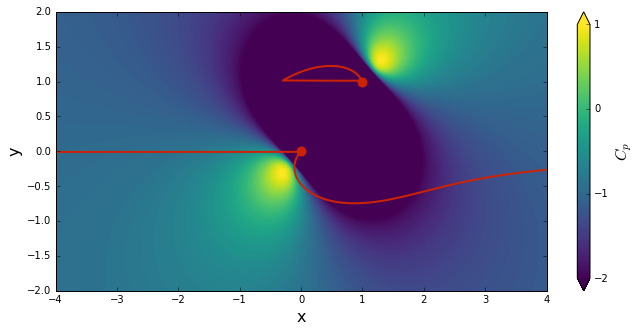

In [154]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2)/u_inf**2

# plot cp field
size = 10
pyplot.figure(figsize=(1.1*size, (yz-ya)/(xz-xa)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xa,xz)
pyplot.ylim(ya,yz)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both',cmap='viridis')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$',fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

# find x and y s.t. u and v = 0
# use x and y to find psi
# plug psi in for levels and watch magic happen

# viridis colormap for colorblind --> busby